In [1]:
# Make sure you are running on Colab
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
#     !pip install yellowbrick
#     !pip install gower
#     !pip install scikit-learn-extra
#     !pip install kmodes

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import plotly.express as px
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

## PCA and Clustering 

Delta Airlines' website have data on all of their aircraft in a certain site section.
In this homework, we will investigate the different aircraft in Delta’s fleet. Which planes are similar? Which are dissimilar?

In [3]:
# We begin by loading inspecting the data
delta_data = pd.read_csv('delta.csv', index_col=0).reset_index()

In [4]:
delta_data.head(50)

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.00,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.00,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.00,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.00,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.00,32,...,1,1,0,1,0,0,0,1,1,1
5,Airbus A330-200 (3L2),0.0,0,0,0.0,0.0,0,21.0,80.00,34,...,1,1,0,0,1,0,0,1,1,1
6,Airbus A330-200 (3L3),0.0,0,0,0.0,0.0,0,21.0,80.00,34,...,1,1,0,1,0,0,0,1,1,1
7,Airbus A330-300,0.0,0,0,0.0,0.0,0,20.0,60.00,34,...,1,1,0,0,1,0,0,1,1,1
8,Boeing 717,0.0,0,0,19.6,37.0,12,0.0,0.00,0,...,0,1,0,0,0,0,1,0,1,1
9,Boeing 737-700 (73W),0.0,0,0,21.0,37.0,12,0.0,0.00,0,...,1,1,1,0,0,0,1,0,1,1


### Exercise 1: check correlation with visualization
Visualize pairwise correlation using scatterplot for columns ``'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)'`` (i.e., columns 16-23 in ``delta_data``)

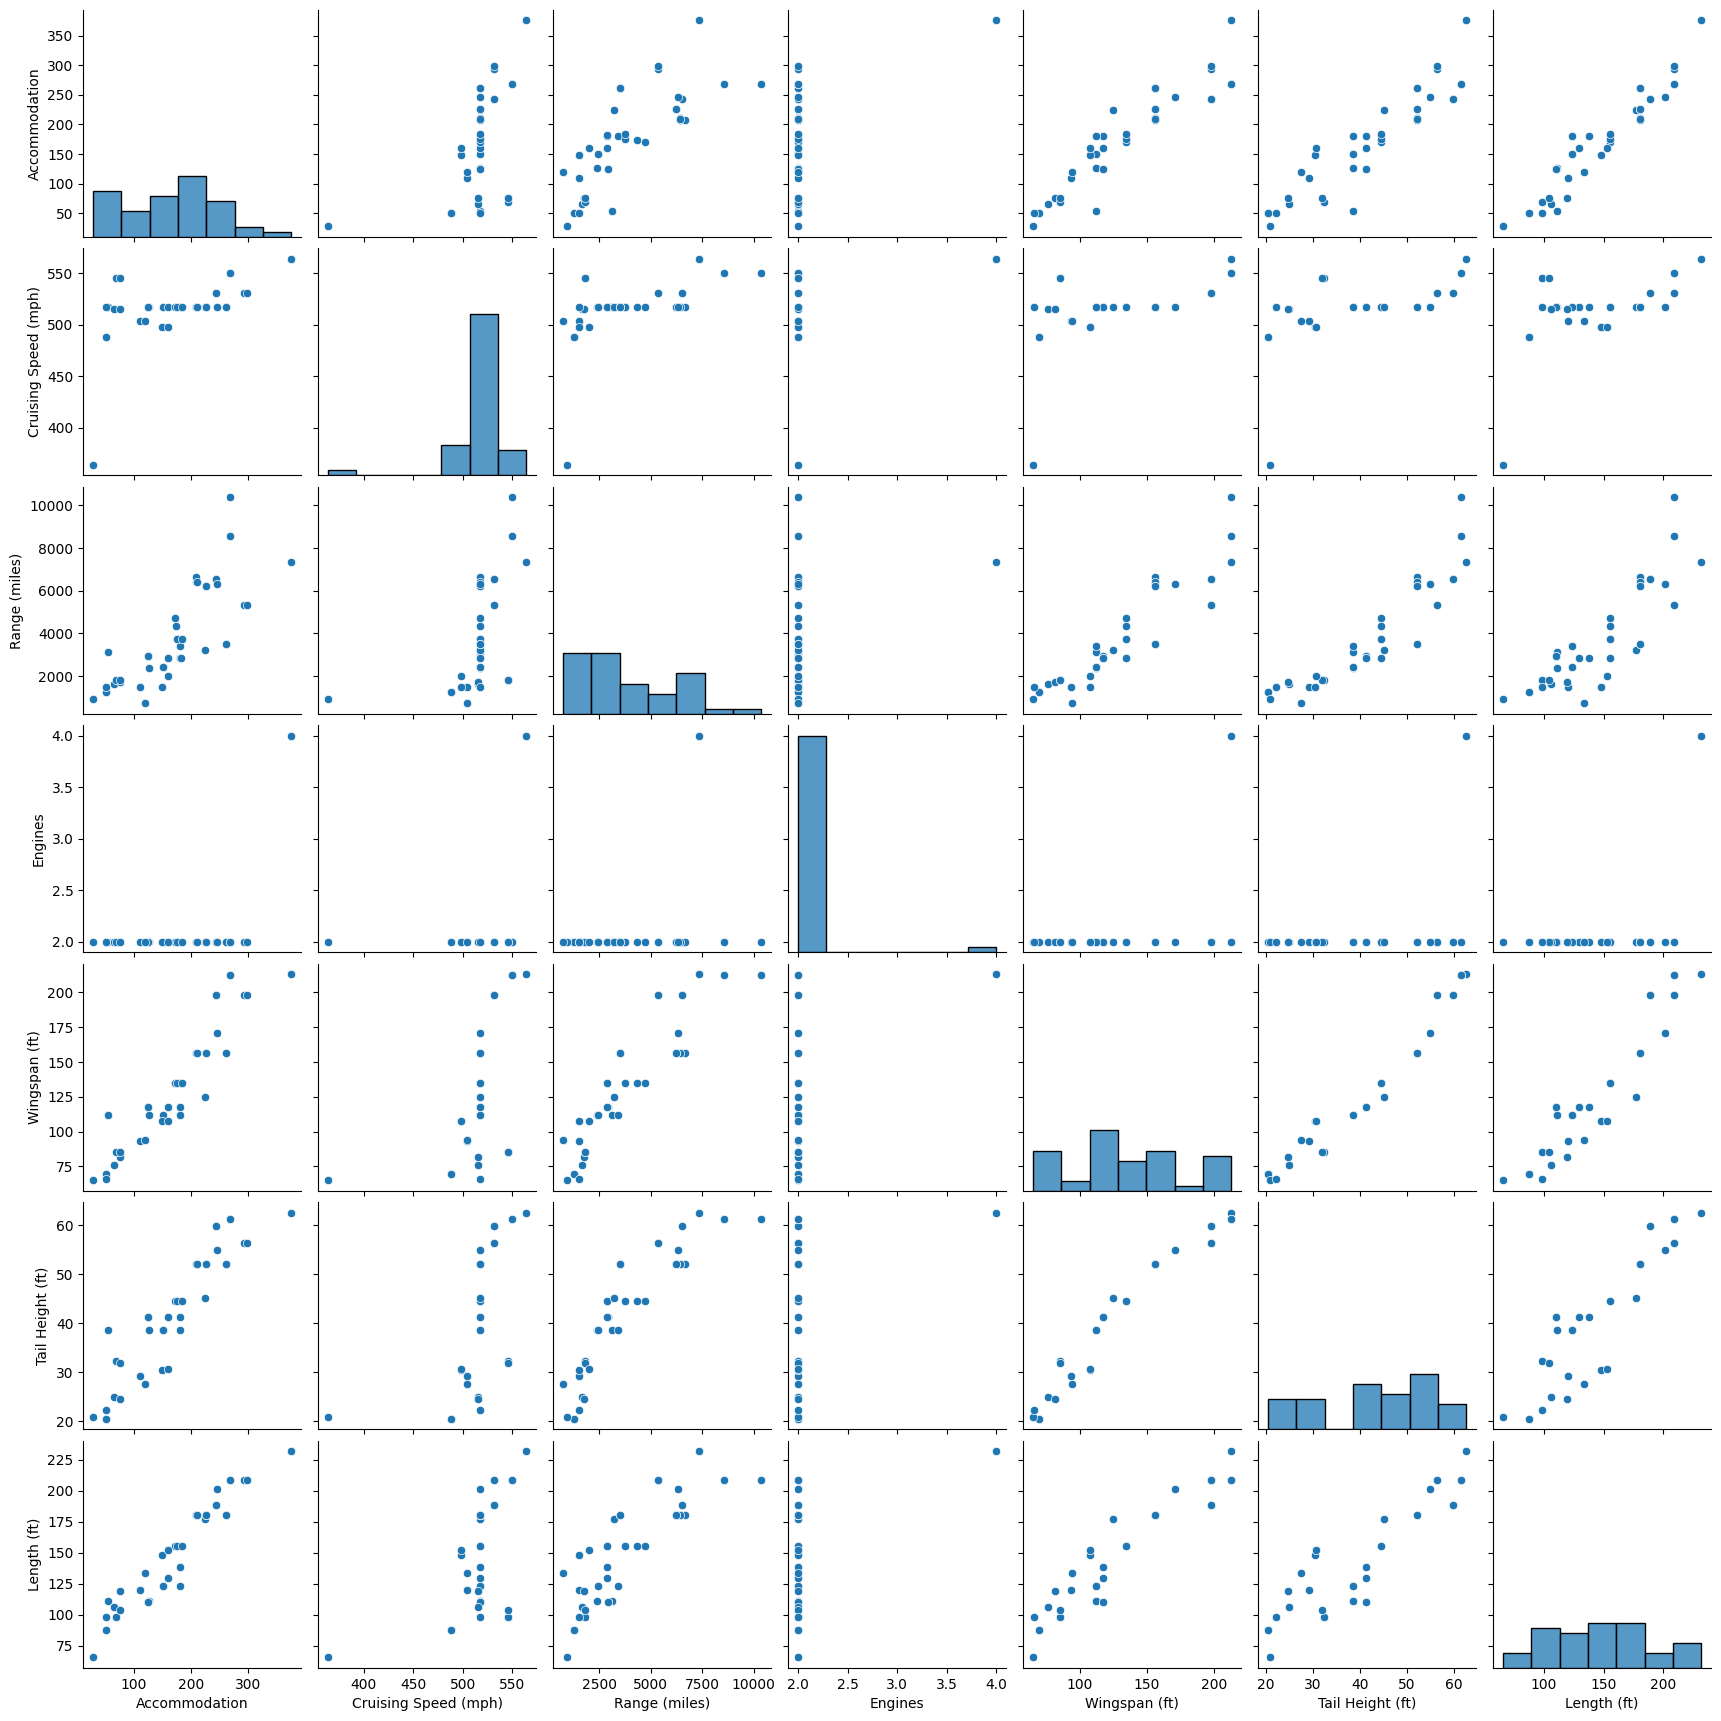

In [5]:
sns.pairplot(delta_data[delta_data.columns[16:23]])
plt.show()

### Exercise 2: Prepare X
- Identify all binary columns (i.e., a binary column is the column that only contains ``0`` and ``1`` as values)

- Generate a dataframe ``X`` removing these binary columns and column ``Aircraft`` (since this is the ``y``)

In [6]:
binary_columns = []
for column in delta_data.columns:
    if set(delta_data[column]) == {0, 1}:
        binary_columns.append(column)
binary_columns

['Wifi',
 'Video',
 'Power',
 'Satellite',
 'Flat-bed',
 'Sleeper',
 'Club',
 'First Class',
 'Business',
 'Eco Comfort',
 'Economy']

In [7]:
X = delta_data.drop(columns=binary_columns + ["Aircraft"])
X.head()

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Seat Width (Economy),Seat Pitch (Economy),Seats (Economy),Accommodation,Cruising Speed (mph),Range (miles),Engines,Wingspan (ft),Tail Height (ft),Length (ft)
0,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,30.5,96,126,517,2399,2,111.83,38.583,111.00
1,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,0.0,0.0,0,54,517,3119,2,111.83,38.583,111.00
2,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,31.5,120,150,517,2420,2,111.83,38.583,123.25
3,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,31.5,120,150,517,2420,2,111.83,38.583,123.25
4,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,18.0,30.5,181,243,531,6536,2,197.83,59.830,188.67


### Exercise 3: PCA
- Standardize X

- conduct PCA 

- calculate the amount of varialce each principal component explain, as well as the cumulative sum

- visualize the cumulative sum of explained variance and set the xticks as the number of components


In [8]:
X_normalized = StandardScaler().fit_transform(X)

In [9]:
pca = PCA().fit(X_normalized)

In [10]:
variance = pca.explained_variance_ratio_
cum_variance = variance.cumsum()
print(variance)
print(cum_variance)

[4.63148487e-01 2.51071052e-01 1.61265689e-01 4.68733864e-02
 3.60892657e-02 1.84418981e-02 9.47340752e-03 4.34022199e-03
 3.28954319e-03 1.43450053e-03 1.20846026e-03 9.51526552e-04
 7.88782498e-04 6.43276642e-04 3.88597783e-04 2.71942151e-04
 1.68280380e-04 1.11848384e-04 2.93264482e-05 1.05081889e-05
 1.76913052e-32 1.82842679e-34]
[0.46314849 0.71421954 0.87548523 0.92235861 0.95844788 0.97688978
 0.98636318 0.99070341 0.99399295 0.99542745 0.99663591 0.99758744
 0.99837622 0.9990195  0.99940809 0.99968004 0.99984832 0.99996017
 0.99998949 1.         1.         1.        ]


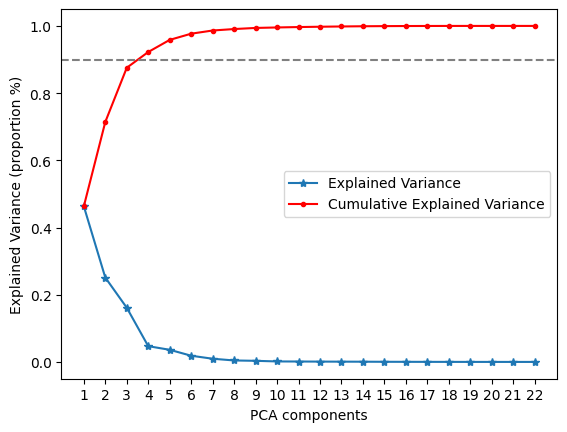

In [11]:
plt.plot(range(1, len(variance)+1),
        variance, "*-", label="Explained Variance")
plt.plot(range(1, len(cum_variance)+1),
        cum_variance, "r.-", label="Cumulative Explained Variance")

plt.legend()
ax = plt.gca()
ax.set_xticks(list(range(1,23)))
ax.set_xlabel("PCA components")
ax.set_ylabel("Explained Variance (proportion %)")
plt.axhline(0.9,linestyle='--',color='grey')


### Exercise 4: Clustering

So, now that we’ve simplified the complex data set into a lower dimensional space we can visualize and
work with, we will use clustering to find patterns in the data, in our case, the aircraft which are most
similar? 

- Pick the number of components which explain 90% (or a little greater) of the variation and represent the transformed data (projected onto the selected principal components) as ``components``

- Using ``components`` as the input, run k-means for k from ``2`` to ``15`` (with ``random_state=1``), and visualize SSE by elbow curve.

- Select the best k using elbow curve and run clustering with the selected k to get the cluster assignment

- Visualize the cluster membership by scatter plots (for each pair of principle components as ``x`` and ``y`` axes)



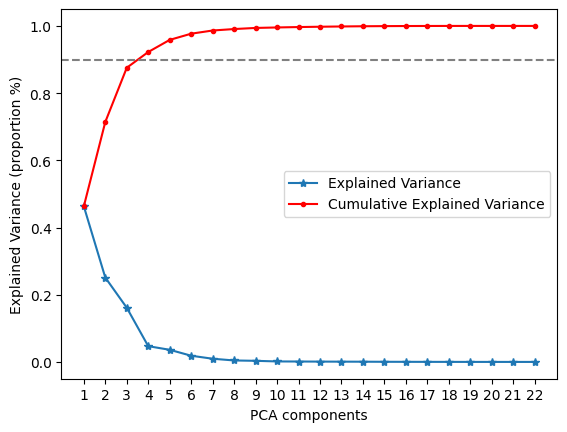

In [12]:
plt.plot(range(1, len(variance)+1),
        variance, "*-", label="Explained Variance")
plt.plot(range(1, len(cum_variance)+1),
        cum_variance, "r.-", label="Cumulative Explained Variance")

plt.legend()
ax = plt.gca()
ax.set_xticks(list(range(1,23)))
ax.set_xlabel("PCA components")
ax.set_ylabel("Explained Variance (proportion %)")
plt.axhline(0.9,linestyle='--',color='grey')


- Pick the number of components which explain 90% (or a little greater) of the variation and represent the transformed data (projected onto the selected principal components) as components
### pick 4 components which explain 90% (or a little greater) of the variation and represent the transformed data

- Using components as the input, run k-means for k from 2 to 15 (with random_state=1), and visualize SSE by elbow curve.

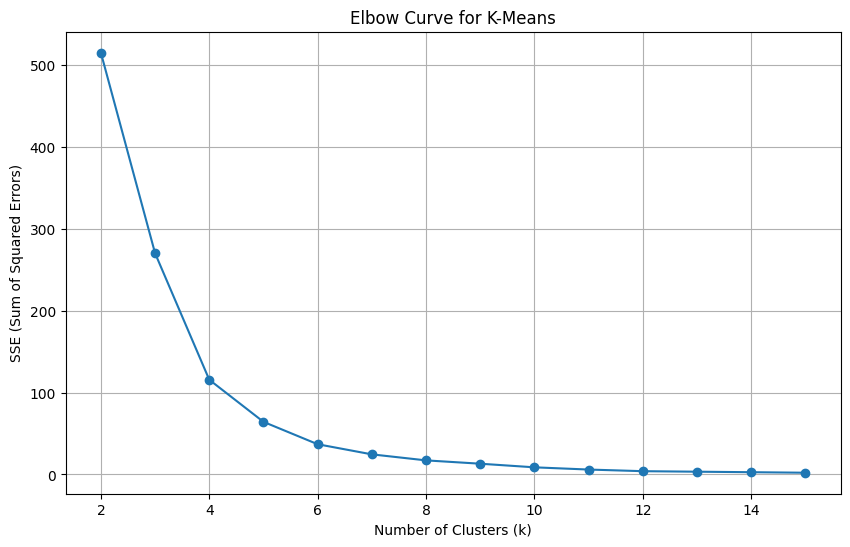

In [13]:
from sklearn.cluster import KMeans
n_components = 4
pca = PCA()
X_pca = pca.fit_transform(X_normalized)
X_reduced = X_pca[:, :n_components]
sse = []
k_range = range(2, 16)

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=1)
    kmeans_model.fit(X_reduced)
    sse.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Curve for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.show()

Select the best k using elbow curve and run clustering with the selected k to get the cluster assignment
- I will select 4 as the best k using elbow curve

In [16]:
kmeans = KMeans(n_clusters=4, random_state=1)
cluster_assignments = kmeans.fit_predict(X_reduced)
X["cluster"] = cluster_assignments
X.head()

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Seat Pitch (Economy),Seats (Economy),Accommodation,Cruising Speed (mph),Range (miles),Engines,Wingspan (ft),Tail Height (ft),Length (ft),cluster
0,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,30.5,96,126,517,2399,2,111.83,38.583,111.00,0
1,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,0.0,0,54,517,3119,2,111.83,38.583,111.00,2
2,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,31.5,120,150,517,2420,2,111.83,38.583,123.25,0
3,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,31.5,120,150,517,2420,2,111.83,38.583,123.25,0
4,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,30.5,181,243,531,6536,2,197.83,59.830,188.67,1


Visualize the cluster membership by scatter plots (for each pair of principle components as x and y axes)

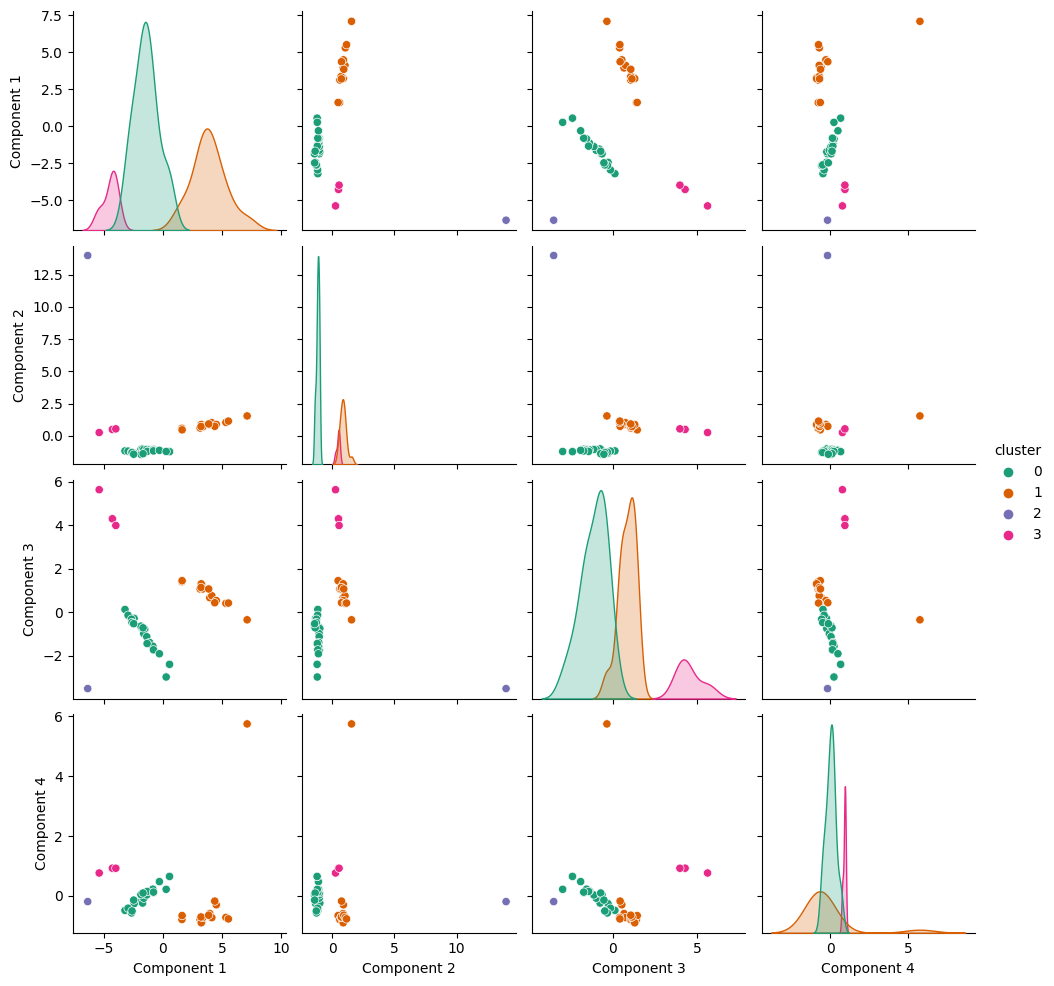

In [17]:
comp_df = pd.DataFrame(X_reduced,columns=['Component 1','Component 2','Component 3','Component 4'])
comp_df['cluster']=cluster_assignments
sns.pairplot(comp_df, hue="cluster", palette='Dark2')
plt.show()